### Intoduction

In Modern agriculture, farmers must optimise crop yield to ensure profitability and sustainability. Assessing soil conditions, including nitrogen, phosphorus, potassium levels, and pH values, is crucial in determining the ideal crop for a specific field.

However, this process can be costly and time-consuming, this prompts farmers to prioritise specific soil metrics based on budget constraints. To address this challenge, a machine learning approach is required to develop very good models capable of accurately predicting the optimal crop based on soil characteristics.

### Problem Statement
This aim of this project is to build and comapre multiple classification algorithms to predict crop types using soil metrics and providing farmers with efficient decsiion-making tools for crop selection.

Objectives:
1. Build and compare five (5) classification algorithm and select the best performing model


2. Using the identified best model, build an application that helps farmers to make effective and efficient crop selection decisions

### Methods:

1. #### Data collection and Preparation: 
The dataset, obtained from DataCamp (Famous online Data Science Platform - https://www.datacamp.com/) containing the soil metrics and crop types will be loaded and read. 

2. Data Prereprocessing:
Missing values were checked, and ategorical variables were encoded using Label Encoder.

2. #### Exploratory Data Analysis (EDA):
Exploaratory data analysis was performed in order to identify relevant patterns, features, correlations and their importance in predicting crop types.

3. #### Model Selection:
Various classification algorithm such as Logistic regression,Random Forests, Decision Trees, Gradient Boosting, and SUpport Vector Machines (SVM) which are suitable for multi-class classification tasks were used.

4. #### Model Training and Evaluation:
Each Algorithm are trained  using the training data, the performance were evaluated using by using metrics such as accuracy, precisions, recall, and F1 score.

5. #### Hyperparameter Tuning:
The parameters of the selected algorithms were fine-tunned using GridSearch method to optimize the performance of the models.

6. #### Model Comparison:
The performance of the different algorithms were compared and the best-performing model for predicting crop types based on the soil metrics in the dataset was identified

7. #### crop predicting App:
Finally, a crop-predicting app is built using the best-performing model.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Preprocessing

In [2]:
# Load soil_measure dataset
crops = pd.read_csv("soil_measures.csv")

In [3]:
# Display the first few rows of the dataset
crops.head()

,N,P,K,pH,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


#### Exploratory Data Analysis

In [4]:
# Explore the Summary Statistics
crops.describe()

,N,P,K,pH
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


The summary statistics above provide insight into the distribution and the variability of the soil metrics.

The range of values for each soil metric (Nitrogen, Phosphorus, Potassium, pH) is quite broad, suggesting significant variability in soil composition across the samples.

The interquartile range (IQR) for Nitrogen (N) is from 21 to 84.25, which shows that 50% of the samples fall within this range.

A higher standard deviation for Potassium (K) (50.65) suggests greater variability in the potassium level of the soil compared to other metrics.

pH values range from acidic (minimum of 3.50) to alkaline (maximum of 9.94). The mean pH value is approximately 6.47, suggesting a slightly acidic to neutral soil pH overall.

In [5]:
# Check for a concise summary of the DataFrame
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   pH      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


The dataset has 2200 observations, each representing soil metrics and the corresponding crop type.
The dataset consists of five features which are "N", "P", "K", "pH" and  "crop"
The "crop" column is a categorical variable while others are numerical.


In [6]:
# Check for missing values
crops.isna().sum()

N       0
P       0
K       0
pH      0
crop    0
dtype: int64

There are no missing data in the soil_measures dataset.

In [7]:
# Check for class imbalance
print("Class distribution:")
print(crops['crop'].value_counts())

Class distribution:
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64


There is no evidence of class imbalance, as all the crop types have equal number of samples. With a balance class distribution, machine learning models can learn from each class equally, this suggest that in this project, there is less likelihood of exhibition of bias, which leads to more accurate predictions and usability of the model for unseen data.

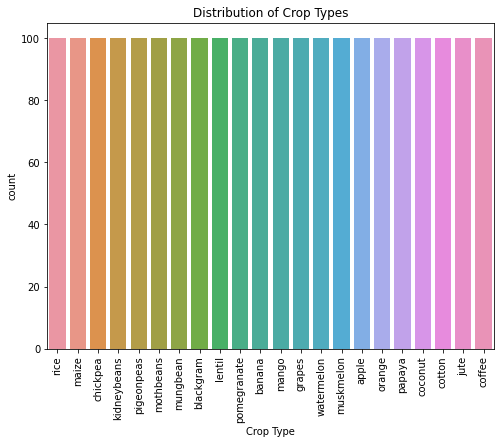

In [8]:
# Visualise the distribution of crop types
plt.figure(figsize=(8, 6))
sns.countplot(data=crops, x="crop")
plt.title("Distribution of Crop Types")
plt.xlabel("Crop Type")
plt.xticks(rotation=90)
plt.show()

The soil_measure dataset appears to have equal represntation of each crop type with 100 samples for each of the 22 crop types. This suggests a balanced distribution of classes across the dataset

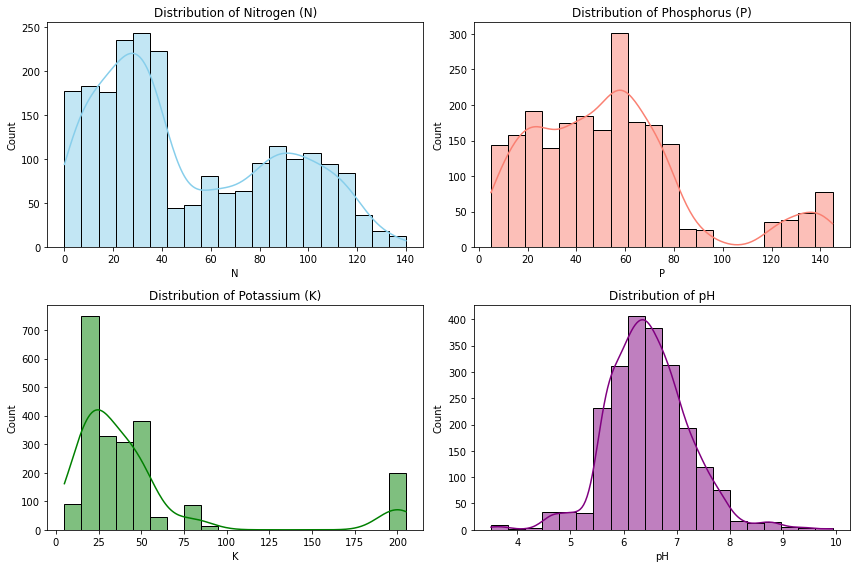

In [9]:
# Visualise the distribution of the metrics
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=crops, x="N", bins=20, kde=True, color="skyblue")
plt.title("Distribution of Nitrogen (N)")

plt.subplot(2, 2, 2)
sns.histplot(data=crops, x="P", bins=20, kde=True, color="Salmon")
plt.title("Distribution of Phosphorus (P)")

plt.subplot(2, 2, 3)
sns.histplot(data=crops, x="K", bins=20, kde=True, color="green")
plt.title("Distribution of Potassium (K)")

plt.subplot(2, 2, 4)
sns.histplot(data=crops, x="pH", bins=20, kde=True, color="purple")
plt.title("Distribution of pH")


plt.tight_layout()
plt.show()

From the histogram, the distribution of Nitrogen appears relatively normal with a peak around 20-40.

The distribution of Phosphorus appears skewed to the right, with a peak around 40-60. and more samples more higher concentrations of phosphoru.

Potassium: The distribution of potassium also appears skewed to the right, with a peak around 15-25. The histogram suggests that there seems to be more samples with higher concentrations of potassium.

pH: The distribution appears somewhat normal with a peak between the pH of 6-7, which is considered neutral.


In [10]:
# Import library
from sklearn.preprocessing import LabelEncoder

# Initialise labelEncoder
label_encoder = LabelEncoder()

# Encode the "crop" column(target variable
crops["crop"] = label_encoder.fit_transform(crops["crop"])

The labelEncoder method was used to encode the "crop" column in the DataFrame ("crops") whic is the target variable.

This encoding transforms the categorical labels into numerical values, making it easier for machine learning algorithms to interpret and process them during model training.

In [11]:
# correlation between  soil metrics and crop type
metrics_corr = crops.corr()
metrics_corr

,N,P,K,pH,crop
N,1.000000,-0.231460,-0.140512,0.096683,-0.031130
P,-0.231460,1.000000,0.736232,-0.138019,-0.491006
K,-0.140512,0.736232,1.000000,-0.169503,-0.346417
pH,0.096683,-0.138019,-0.169503,1.000000,-0.012253
crop,-0.031130,-0.491006,-0.346417,-0.012253,1.000000


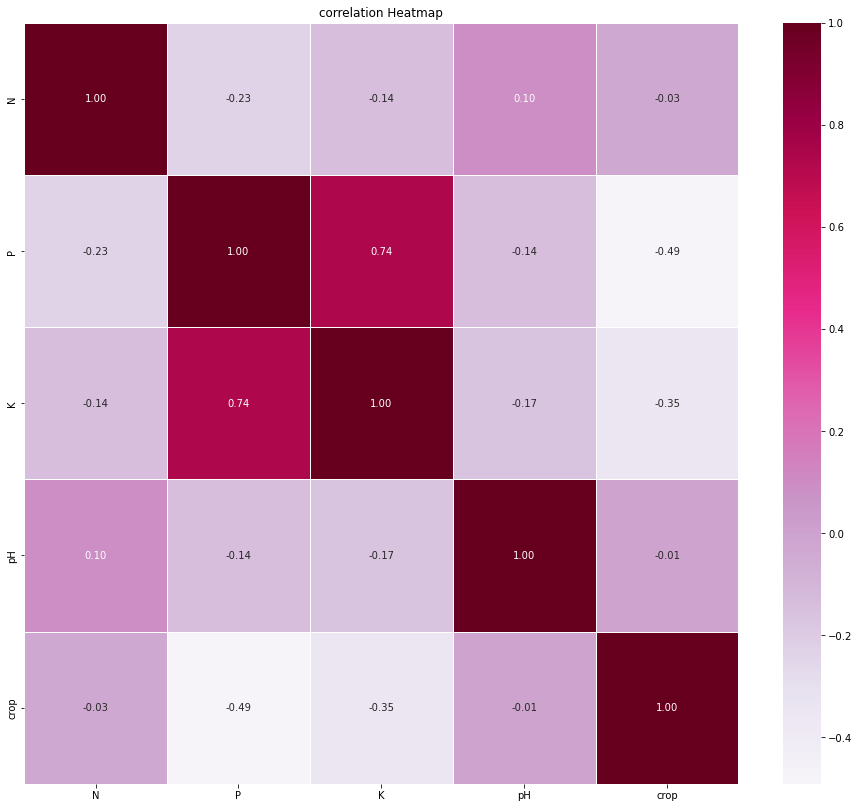

In [12]:
plt.figure(figsize=(16, 14))
sns.heatmap(crops.corr(), annot=True, cmap="PuRd", fmt=".2f", linewidths=0.5)
plt.title("correlation Heatmap")
plt.show()

In the correlation matrix, there are correlations observed between some pairs of soil metrics:
Nitrogen (N) and Phosphorus (P) have a negative correlation coefficient of approximately -0.231. This suggests a weak negative linear relationship between Nitrogen and Phosphorus levels.

Phosphorus (P) and Potassium (K) have a positive correlation coefficient of approximately 0.736. This indicates a strong positive linear relationship between Phosphorus and Potassium levels.

Other correlations between soil metrics are relatively weak (close to 0), suggesting little to no linear relationship between them.


Furthermore, the correlation coefficients between soil metrics and crop type are relatively low in magnitude, indicating weak linear relationships.

However, negative correlations are observed between some soil metrics (e.g., Phosphorus and Potassium) and crop type. This suggests that specific soil metrics may influence the type of crop grown.

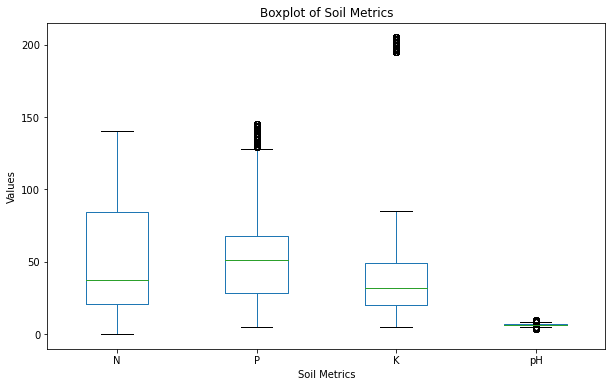

In [13]:
# create boxplot for soil metric
plt.figure(figsize=(10, 6))
crops.boxplot(column=["N", "P", "K", "pH"], grid=False)
plt.title("Boxplot of Soil Metrics"),
plt.xlabel("Soil Metrics")
plt.ylabel("Values")
plt.show()

In the boxplot, the median value for nitrogen is around 50; for phosphorus, it's around 30; for potassium, it's around 60; and for pH, it's close to 7.
The IQR for nitrogen suggests that half of the data points have values between 25 and 75.

####  Model Building

In [14]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, precision_score, recall_score, recall_score, f1_score 

In [15]:
# Split into feature and target sets
X = crops.drop(columns="crop")
y = crops["crop"]

In [16]:
# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Split the scaled data into training and tester
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

"X" is the feature matrix which contains all columns except the "crop" column
"y" is the target variable

The features are standardized to help improve performance, stability and interpretability of the models. It ensures that the feature are on the same scale and have similar distributions

The scaled feature ("X_scaled") and the target variable ("y") are split into training snd testing sets using "train_test_split"

The training set ("X_train", "y_train") contains 80% of the data while the testing set ("X_test", "y_test") contains 20% of the data

In [18]:
# Step 6: Define a dictionary of classifiers with parameter grids for hyperparameter tuning
classifiers = {
    "Logistic Regression": (LogisticRegression(max_iter=1000, multi_class="multinomial"), 
                             {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}),
    
    "Decision Tree": (DecisionTreeClassifier(), 
                      {'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    
    "Random Forest": (RandomForestClassifier(), 
                      {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 
                       'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    
    "Gradient Boosting": (GradientBoostingClassifier(), 
                          {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5, 1]}),
    
    "Support Vector Machine": (SVC(), 
                               {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
                                'gamma': ['scale', 'auto']})
}


# Reference:
# the values for hyperparameter tuning were adapted and modified from stackoverflow overflow.com/)

#### Model Comparison, Hyperparameter Tunning, Model Training and Evaluation

In [19]:
# Train and evaluate each classifier with hyperparameter tuning
model_performance = {}
for clf_name, (clf, param_grid) in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    model_performance[clf_name] = {"Accuracy": accuracy, 
                                    "Precision": precision, "Recall": recall, "F1 Score": f1}

    # Print model performance
    print(f"Performance of {clf_name} (after hyperparameter tuning):")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print()
    

# Reference:
# the values for hyperparameter tuning were adapted and modified from stackoverflow overflow.com/)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1519, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 483, in _check_multi_class
  

Performance of Logistic Regression (after hyperparameter tuning):
Accuracy: 0.7
Precision: 0.6896719230480659
Recall: 0.7
F1 Score: 0.6866435707286027

Performance of Decision Tree (after hyperparameter tuning):
Accuracy: 0.7727272727272727
Precision: 0.7881806714213193
Recall: 0.7727272727272727
F1 Score: 0.7638766852698387

Performance of Random Forest (after hyperparameter tuning):
Accuracy: 0.7954545454545454
Precision: 0.8012757836695584
Recall: 0.7954545454545454
F1 Score: 0.790698991533738

Performance of Gradient Boosting (after hyperparameter tuning):
Accuracy: 0.7909090909090909
Precision: 0.8031042622603489
Recall: 0.7909090909090909
F1 Score: 0.7870535722832991

Performance of Support Vector Machine (after hyperparameter tuning):
Accuracy: 0.775
Precision: 0.7918263794142201
Recall: 0.775
F1 Score: 0.7670544150979768



Grid Search for Hyperparameter Tuning: I defined a dictionary of classifiers and their respective parameter grids for hyperparameter tuning. This approach allows me to search for each classifier's best combination of hyperparameters systematically.

Cross-Validation: I used 5-fold cross-validation (cv=5) within the GridSearchCV, which is a good practice to ensure the robustness of your model evaluation.

Evaluation Metrics: You've calculated and printed several evaluation metrics, including accuracy, precision, recall, and F1-score, for each classifier. These metrics provide a comprehensive view of each model's performance.

Handling Imbalanced Classes: I used the average="weighted" parameter in the precision, recall, and F1-score calculations, which is suitable for handling imbalanced classes in multi-class classification problems.


#### Results

To identify the best model, we need to consider which evaluation metric is most important for our task. Since we are predicting crop types, we want a model with high accuracy and generalization ability.
Based on the performance results:

Random Forest has the highest accuracy (0.7955) among all the models. It also has relatively high precision, recall, and F1 score.

Gradient Boosting has a slightly lower accuracy (0.7909) than Random Forest but higher precision, recall, and F1 score.

Decision Tree also performs well with accuracy (0.7727) close to Gradient Boosting and Random Forest.

Considering both accuracy and the overall balance of precision, recall, and F1 score, Random Forest is the best-performing model for predicting crop types based on the soil metrics in the dataset. It offers a good balance between accuracy and generalization ability.

Therefore,  for the crop prediction application, we use the Random Forest model to provide farmers with efficient decision-making tools for crop selection.

#### Crop Predicting App Creation

In [20]:
def get_soil_metrics():
    
    """
    Prompt User to input soil metrics and perform error handling.
    Ensure that the values that are entered are within a specified range for each metric
    Validate pH values to be within the specific range of 0-14
    """
    while True:
        try:
            # Prompt user to input soil metrics
            print("\n Please enter the following soil metric:")
            N = float(input("Nitrogen content ratio in the soil (in percentage, 0-100): "))
            if not 0 <= N <= 100:
                raise ValueError("Nitrogen content ratio should be between 0 and 100")
                
            P = float(input("Phosphorus content ratio in the soil (in percentage, 0-100): "))
            if not 0 <= P <= 100:
                raise ValueError("Phosphorus content ratio should be between 0 and 100")
                
            K = float(input("Potassium content ratio in the soil (in percentage, 0-100): "))
            if not 0 <= K <= 100:
                raise ValueError("Potassium content ratio should be between 0 and 100")
                
            pH = float(input("pH value of the soil (0-14): "))
            if not 0 <= pH <= 14:
                raise ValueError("pH value should be between 0 and 14")
                
            return [N, P, K, pH]
        except ValueError as e:
            print(f"Error: {e}. Please enter a valid value.")

            
def predict_crop():
    """
    Predict the crop type based on the soil metrics that is provided
    """
    soil_metrics = get_soil_metrics()
    crop_name =best_model.predict([soil_metrics])[0]
    crop = label_encoder.inverse_transform([crop_name])[0]
    return crop

def main():
    """
    Main function to run the Crop Prediction App.

    """
    print("Welcome to the Crop Prediction App")
    while True:
        crop = predict_crop()
        print(f"\nThe predicted crop type is: {crop}")
        select =input("\nDo you want to predict another crop type? (yes/no)")
        if select.lower() !="yes":
            break
                
# call main function directly
main()

Welcome to the Crop Prediction App

 Please enter the following soil metric:
Nitrogen content ratio in the soil (in percentage, 0-100): 78
Phosphorus content ratio in the soil (in percentage, 0-100): 49
Potassium content ratio in the soil (in percentage, 0-100): 87
pH value of the soil (0-14): 7

The predicted crop type is: mothbeans

Do you want to predict another crop type? (yes/no)yes

 Please enter the following soil metric:
Nitrogen content ratio in the soil (in percentage, 0-100): 78
Phosphorus content ratio in the soil (in percentage, 0-100): 67
Potassium content ratio in the soil (in percentage, 0-100): 56
pH value of the soil (0-14): 3

The predicted crop type is: mothbeans

Do you want to predict another crop type? (yes/no)yes

 Please enter the following soil metric:
Nitrogen content ratio in the soil (in percentage, 0-100): 67
Phosphorus content ratio in the soil (in percentage, 0-100): 89
Potassium content ratio in the soil (in percentage, 0-100): 45
pH value of the soil (

#### Conclusion and Recommendation
More data needs to be used, better intuitive and user-friendly interface should be built and made accessible to farmers
